In [9]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np 

## pandas 

In [10]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [11]:
penguins_df = sns.load_dataset('penguins')
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


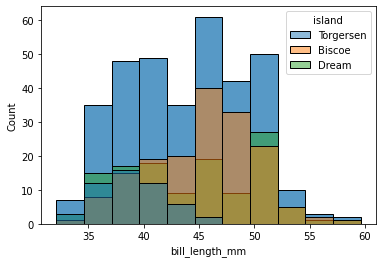

In [12]:
# get rid of the missing values in bill_depth, 

penguins_df.dropna(subset = ["bill_depth_mm"], inplace=True)

# get rid of row 3 
penguins_df.drop(4)

# convert body mass in grams to body mass in kilo grams   conversion ~ 0.001 

penguins_df["body_mass_g"] = (penguins_df["body_mass_g"]) * 0.001

# rename the body mass column 

penguins_df.rename(columns = {'body_mass_g' :'body_mass_kg'})




# look at the distribution of bill length 

sns.histplot(penguins_df["bill_length_mm"])
penguins_df.describe()

# look at the differences in the distribution of bill length between islands 
sns.histplot(x="bill_length_mm", hue="island", data = penguins_df)


# calculate the mean of bill lenth 

mean_bill_length = penguins_df["bill_length_mm"].mean()

# create a new column called big billed if the penguin has a bill greater than the median 

penguins_df["big_billed"] = penguins_df["bill_length_mm"].map(lambda x: "large" if x > mean_bill_length else "small")


In [13]:
df = sns.load_dataset('glue')
df

,Model,Year,Encoder,Task,Score
0,ERNIE,2019,Transformer,CoLA,75.5
1,T5,2019,Transformer,CoLA,71.6
2,RoBERTa,2019,Transformer,CoLA,67.8
3,BERT,2018,Transformer,CoLA,60.5
4,BiLSTM+ELMo,2018,LSTM,CoLA,32.1
...,...,...,...,...,...
59,BERT,2018,Transformer,RTE,70.1
60,BiLSTM+ELMo,2018,LSTM,RTE,57.4
61,BiLSTM+CoVe,2017,LSTM,RTE,52.7
62,BiLSTM+Attn,2017,LSTM,RTE,58.4


/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


0           BERT
1         BiLSTM
2    BiLSTM+Attn
3    BiLSTM+CoVe
4    BiLSTM+ELMo
5          ERNIE
6        RoBERTa
7             T5
dtype: object

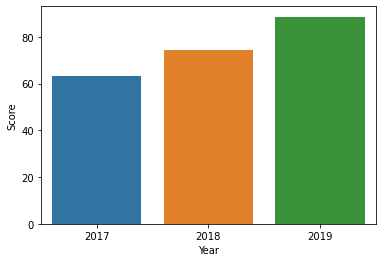

In [14]:
# plot a bar graph with matplotlib and seaborn of the average score per year 
#df.groupby("Year").mean().plot(kind="bar")
grouped_year_df = df.groupby("Year").mean()
sns.barplot(grouped_year_df.index, grouped_year_df['Score'])

# add titles and axis 



# find the model with the lowest score
df.loc[(df["Score"] == df["Score"].min())]

# find the most occuring model in the data set 
df["Model"].mode()

In [15]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [37]:
# find the virginica flower with the largest sepal width 
virginica_df = iris_df.loc[iris_df["species"] == "virginica"]
virginica_df.loc[virginica_df["sepal_width"] == virginica_df["sepal_width"].max()]

,sepal_length,sepal_width,petal_length,petal_width,species
117,7.7,3.8,6.7,2.2,virginica
131,7.9,3.8,6.4,2.0,virginica


In [42]:
cars_dict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": 1964
}

# convert the keys in this dictionary to a list


info =list(cars_dict.keys())

In [43]:
cars=list(cars_dict.values())

In [45]:
tuples = list(zip(info, cars))
tuples

[('brand', 'Ford'), ('model', 'Mustang'), ('year', 1964)]

## JSONS 

In [47]:



data =[ 
   { 
      "id":1,
      "name":"cridmas",
      "color":[ 
         "red",
         "green"
      ]
   },
   { 
      "id":2,
      "name":"Rocco",
      "color":[ 
         "pink",
         "yellow"
      ]
   }
]

data

[{'id': 1, 'name': 'cridmas', 'color': ['red', 'green']},
 {'id': 2, 'name': 'Rocco', 'color': ['pink', 'yellow']}]

In [49]:
# create a list of all the values in this dictionary 


data_list=[]

for item in data:
    for thing in item:
        data_list.append(item[thing])
    
data_list


[1, 'cridmas', ['red', 'green'], 2, 'Rocco', ['pink', 'yellow']]

In [73]:
data[1]["color"]

for dict in data:
    dict["color"][1] = "red"

data

[{'id': 1, 'name': 'cridmas', 'color': ['red', 'red']},
 {'id': 2, 'name': 'Rocco', 'color': ['pink', 'red']}]

In [75]:
(data[0]["name"], data[1]["name"])

('cridmas', 'Rocco')

In [77]:
import json

sampleJson = """{ 
   "company":{ 
      "employee":{ 
         "name":"emma",
         "payble":{ 
            "salary":7000,
            "bonus":800
         }
      }
   }
}"""

data = json.loads(sampleJson)

In [78]:
data["company"]["employee"]["payble"]["salary"]

7000

In [80]:
# get me the name emma from the json 

data["company"]["employee"]["name"]
            

# get emma salary and assign it to a variable 
emma_salary=data["company"]["employee"]["payble"]["salary"]
emma_bonus=data["company"]["employee"]["payble"]["bonus"]

# add emmas salary and bonus together 
total_pay = emma_salary + emma_bonus
total_pay

7800

In [134]:
(data['company']['employee']['payble']['salary'])

7000

In [88]:
#edit bonus to be 4000

data['company']['employee']['payble']['bonus'] = 4000
data

{'company': {'employee': {'name': 'emma',
   'payble': {'salary': 7000, 'bonus': 4000}}}}

In [135]:
data = [{"code":"Company1","exchange_short_name":"ST","date":"2000-01-01"},
{"code":"Company2","exchange_short_name":"ST","date":"2000-01-01"}]

In [136]:
# print the date from each dictionary in a loop 

for dictionary in data:
    print(dictionary['date'])

2000-01-01
2000-01-01


In [89]:
data2={
    "updated": "2020-07-09",
    "versions": [
        {
            "family": "macOS",
            "version": "10.14",
            "codename": "Mojave",
            "announced":"2018-06-04",
            "released": "2018-09-24",
            "requirements": [
                "iMac (Late 2012 or newer)",
                "iMac Pro (2017)",
                "Mac Mini (Late 2012 or newer)",
                "Mac Pro (Late 2013; Mid 2010 and Mid 2012 models with recommended Metal-capable graphics cards)",
                "MacBook (Early 2015 or newer)",
                "MacBook Air (Mid 2012 or newer)",
                "MacBook Pro (Mid 2012 or newer)",
                "2 GB of memory",
                "12.5 - 18.5 GB of available avaialable disk space",
                "OS X 10.8 or later"
            ],
            "releases": [
                {
                    "version": "10.14",
                    "build": "18A391",
                    "darwin": "18.0.0",
                    "released": "2018-09-24"
                },
                {
                    "version": "10.14.1",
                    "build": "18B75",
                    "darwin": "18.2.0",
                    "released": "2018-10-30"
                },
                {
                    "version": "10.14.2",
                    "build": "18C54",
                    "darwin": "18.2.0",
                    "released": "2018-12-05"
                },
                {
                    "version": "10.14.3",
                    "build": "18D42",
                    "darwin": "18.2.0",
                    "released": "2019-01-22"
                },
                {
                    "version": "10.14.4",
                    "build": "18E226",
                    "darwin": "18.5.0",
                    "released": "2019-03-25"
                },
                {
                    "version": "10.14.5",
                    "build": "18F132",
                    "darwin": "18.6.0",
                    "released": "2019-05-13"
                },
                {
                    "version": "10.14.6",
                    "build": "18G84",
                    "darwin": "18.7.0",
                    "released": "2019-07-22"
                }
            ]
        },
        {
            "family": "macOS",
            "version": "10.15",
            "codename": "Catalina",
            "announced":"2019-06-03",
            "released": "2019-10-07",
            "requirements": [
                "iMac (Late 2012 or newer)",
                "iMac Pro (2017)",
                "Mac Mini (Late 2012 or newer)",
                "Mac Pro (Late 2013)",
                "MacBook (Early 2015 or newer)",
                "MacBook Air (Mid 2012 or newer)",
                "MacBook Pro (Mid 2012 or newer)",
                "4 GB of memory",
                "12.5 GB of available avaialable disk space",
                "OS X 10.11.5 or later"
            ],
            "releases": [
                {
                    "version": "10.15",
                    "build": "19A583",
                    "darwin": "19.0.0",
                    "released": "2019-10-07"
                },
                {
                    "version": "10.15.1",
                    "build": "19B88",
                    "darwin": "19.0.0",
                    "released": "2019-10-29"
                },
                {
                    "version": "10.15.2",
                    "build": "19C57",
                    "darwin": "19.2.0",
                    "released": "2019-12-10"
                },
                {
                    "version": "10.15.3",
                    "build": "19D76",
                    "darwin": "19.3.0",
                    "released": "2020-01-28"
                },
                {
                    "version": "10.15.4",
                    "build": "19E266",
                    "darwin": "19.4.0",
                    "released": "2020-03-24"
                },
                {
                    "version": "10.15.5",
                    "build": "19F96",
                    "darwin": "19.5.0",
                    "released": "2020-05-26"
                }
            ]
        }
    ]
}

In [152]:
data2["versions"][0]["releases"][0]

{'version': '10.14',
 'build': '18A391',
 'darwin': '18.0.0',
 'released': '2018-09-24'}

In [154]:
#return a list of all the darwins in the json structure
#make dictionary where key is code name and values are darwins

darwins = []
versions = data2["versions"]

for entry in versions:
    for item in entry["releases"]:
        for thing in item:
            if thing == "darwin":
                darwins.append(item[thing])

darwins

['18.0.0',
 '18.2.0',
 '18.2.0',
 '18.2.0',
 '18.5.0',
 '18.6.0',
 '18.7.0',
 '19.0.0',
 '19.0.0',
 '19.2.0',
 '19.3.0',
 '19.4.0',
 '19.5.0']

In [136]:
versions[1]

{'family': 'macOS',
 'version': '10.15',
 'codename': 'Catalina',
 'announced': '2019-06-03',
 'released': '2019-10-07',
 'requirements': ['iMac (Late 2012 or newer)',
  'iMac Pro (2017)',
  'Mac Mini (Late 2012 or newer)',
  'Mac Pro (Late 2013)',
  'MacBook (Early 2015 or newer)',
  'MacBook Air (Mid 2012 or newer)',
  'MacBook Pro (Mid 2012 or newer)',
  '4 GB of memory',
  '12.5 GB of available avaialable disk space',
  'OS X 10.11.5 or later'],
 'releases': [{'version': '10.15',
   'build': '19A583',
   'darwin': '19.0.0',
   'released': '2019-10-07'},
  {'version': '10.15.1',
   'build': '19B88',
   'darwin': '19.0.0',
   'released': '2019-10-29'},
  {'version': '10.15.2',
   'build': '19C57',
   'darwin': '19.2.0',
   'released': '2019-12-10'},
  {'version': '10.15.3',
   'build': '19D76',
   'darwin': '19.3.0',
   'released': '2020-01-28'},
  {'version': '10.15.4',
   'build': '19E266',
   'darwin': '19.4.0',
   'released': '2020-03-24'},
  {'version': '10.15.5',
   'build': '1

In [137]:
versions[1]["codename"]

'Catalina'

In [145]:
versions[1].keys()

dict_keys(['family', 'version', 'codename', 'announced', 'released', 'requirements', 'releases'])

In [164]:
#make dictionary where key is code name and values are darwins

new_dict = {}
for orange in versions:
    new_dict[orange["codename"]] = [x["darwin"] for x in orange["releases"]]

new_dict

{'Mojave': ['18.0.0',
  '18.2.0',
  '18.2.0',
  '18.2.0',
  '18.5.0',
  '18.6.0',
  '18.7.0'],
 'Catalina': ['19.0.0', '19.0.0', '19.2.0', '19.3.0', '19.4.0', '19.5.0']}

In [24]:
for _version in data2["versions"]: 
    print(_version["codename"])
    for _requirement in _version["requirements"]: 
        print("  " + _requirement)

Mojave
  iMac (Late 2012 or newer)
  iMac Pro (2017)
  Mac Mini (Late 2012 or newer)
  Mac Pro (Late 2013; Mid 2010 and Mid 2012 models with recommended Metal-capable graphics cards)
  MacBook (Early 2015 or newer)
  MacBook Air (Mid 2012 or newer)
  MacBook Pro (Mid 2012 or newer)
  2 GB of memory
  12.5 - 18.5 GB of available avaialable disk space
  OS X 10.8 or later
Catalina
  iMac (Late 2012 or newer)
  iMac Pro (2017)
  Mac Mini (Late 2012 or newer)
  Mac Pro (Late 2013)
  MacBook (Early 2015 or newer)
  MacBook Air (Mid 2012 or newer)
  MacBook Pro (Mid 2012 or newer)
  4 GB of memory
  12.5 GB of available avaialable disk space
  OS X 10.11.5 or later
